In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import os
import shutil
print(os.listdir("/content/drive/MyDrive/sem6/ai/ai_package/Dataset"))

['Val', 'Train', 'Prediction']


LOADING DATASETS

In [4]:
#Loading Datasets
TRAIN_PATH = "/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Train"
VAL_PATH = "/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Val"

Importing required libraries


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Building Architecture

In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

Train From Scratch

Data Augmentation

In [8]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


Fit The Model

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

<ipython-input-12-f543b772328c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 189s 25s/step - loss: 0.8604 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 109s 13s/step - loss: 0.6812 - accuracy: 0.5391 - val_loss: 0.6819 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 107s 13s/step - loss: 0.6166 - accuracy: 0.6953 - val_loss: 0.5134 - val_accuracy: 0.8333
Epoch 4/10
8/8 [==============================] - 105s 13s/step - loss: 0.3852 - accuracy: 0.8320 - val_loss: 0.2835 - val_accuracy: 0.9000
Epoch 5/10
8/8 [==============================] - 106s 13s/step - loss: 0.3157 - accuracy: 0.8867 - val_loss: 0.3673 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 113s 14s/step - loss: 0.2976 - accuracy: 0.9023 - val_loss: 0.2168 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 107s 13s/step - loss: 0.2059 - accuracy: 0.9375 - val_loss: 0.0893 - val_accuracy: 0.9833
Epoch 8/10
8/8 [====

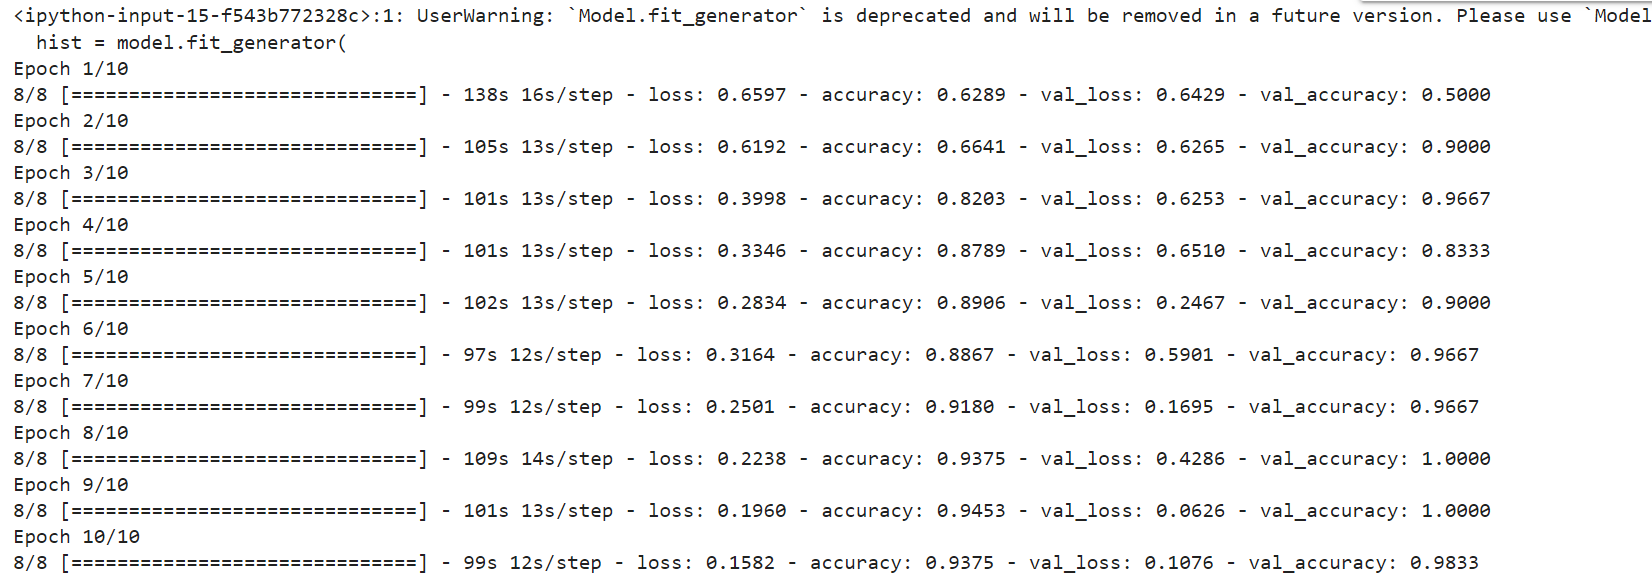

Loss is very less and accuracy is on point

In [13]:
model.save("Detection_Covid_19.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
model.save("/content/drive/MyDrive/sem6/ai/ai_package/Detection_Covid_19.h5")

In [18]:
model.evaluate_generator(train_generator)

<ipython-input-18-e4ade065aa26>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.18431177735328674, 0.9756944179534912]

In [15]:
model.evaluate_generator(validation_generator)


<ipython-input-15-8951cfd684a1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.17006535828113556, 0.9833333492279053]

Test Images

In [20]:
model = load_model("Detection_Covid_19.h5")

In [21]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

Confusion Matrix


In [23]:
y_actual = []
y_test = []
for i in os.listdir("/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Val/Normal"):
  img = image.load_img("/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  predicted_class = np.argmax(p, axis=1)[0]  # Get the index of the class with the highest probability
  y_test.append(predicted_class)
  y_actual.append(1)


1/1 [==============================] - 0s 136ms/step


In [26]:
y_actual = []
y_test = []
for i in os.listdir("/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Val/Covid"):
  img = image.load_img("/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  predicted_class = np.argmax(p, axis=1)[0]  # Get the index of the class with the highest probability
  y_test.append(predicted_class)
  y_actual.append(0)


1/1 [==============================] - 0s 83ms/step


In [27]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

<Axes: >

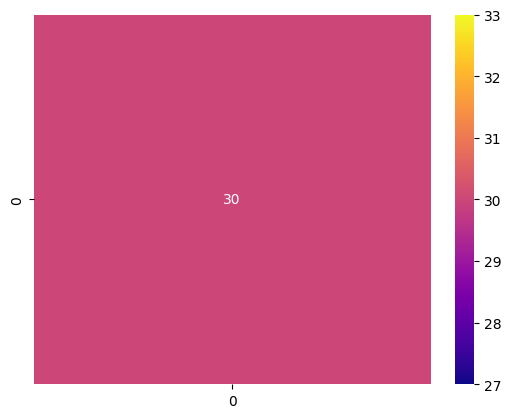

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)
import seaborn as sns
sns.heatmap(cm,cmap = "plasma" , annot=True)

In [31]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion Matrix

Confusion matrix, without normalization
[[30]]


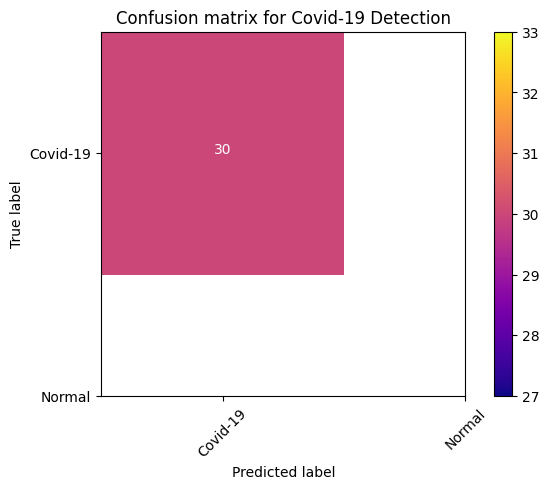

In [32]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")

List all data in history

In [33]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Summarize history for accuracy

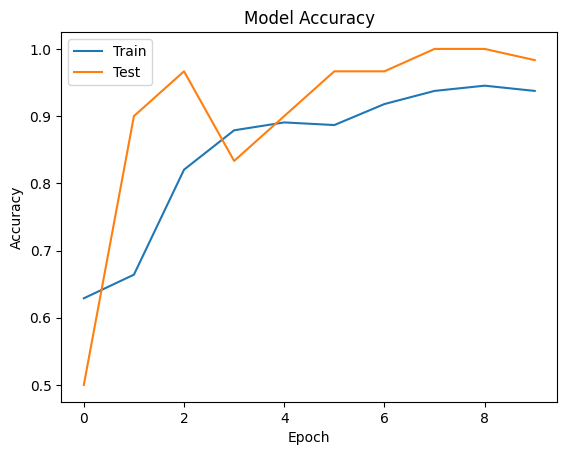

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Summarize history for loss

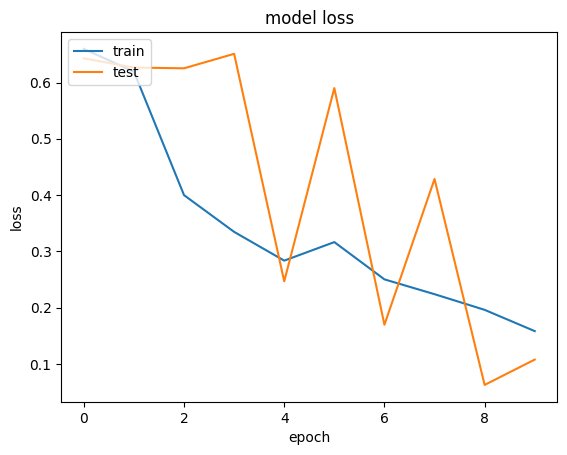

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predictions from X-Ray Images

1/1 [==============================] - 0s 182ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


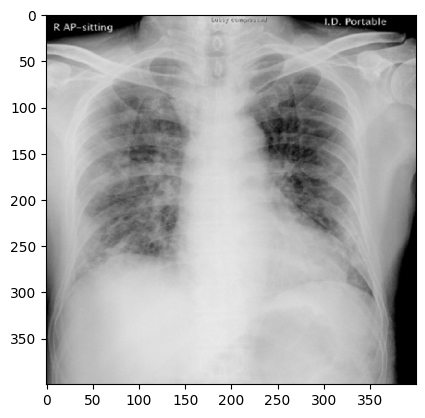

In [40]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices
imggg = cv2.imread('/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

1/1 [==============================] - 0s 162ms/step
This Xray Image is of Negative covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


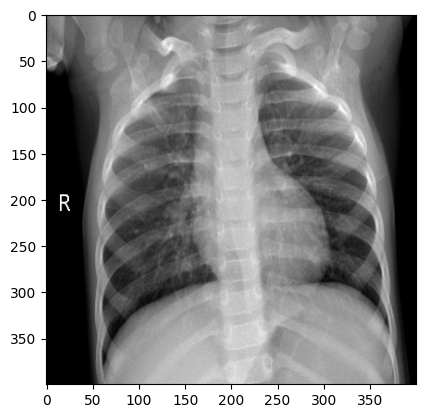

In [42]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices

imggg = cv2.imread('/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

**Usage of the hybrid CNN-HCA model**

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Path to your dataset directory containing the 'val' folder
val_dir = VAL_PATH
image_height = 224
image_width = 224


# Function to load and preprocess images from the 'val' directory
def load_images_from_val(directory, label):
    X = []
    y = []
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        img = image.load_img(img_path, target_size=(image_height, image_width), grayscale=True)
        img = image.img_to_array(img)
        img = img / 255.0  # Normalize pixel values
        X.append(img)
        y.append(label)
    return np.array(X), np.array(y)

# Load COVID-19 images from the 'val/Covid' folder
covid_dir = os.path.join(val_dir, "Covid")
X_covid, y_covid = load_images_from_val(covid_dir, 1)

# Load normal images from the 'val/Normal' folder
normal_dir = os.path.join(val_dir, "Normal")
X_normal, y_normal = load_images_from_val(normal_dir, 0)


# Concatenate COVID-19 and normal images
X = np.concatenate((X_covid, X_normal), axis=0)
y = np.concatenate((y_covid, y_normal), axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


X_train shape: (48, 224, 224, 1), y_train shape: (48,)
X_test shape: (12, 224, 224, 1), y_test shape: (12,)


the hill climbing algorithm is applied to find the best hyperparameters for a convolutional neural network (CNN) model for classifying COVID-19 chest X-ray images.

*   The algorithm starts with an initial set of hyperparameters, trains the model, evaluates its performance, and then randomly perturbs the hyperparameters to explore the search space.
*    If a set of hyperparameters leads to a higher accuracy than the current best, it becomes the new best set of hyperparameters.
*   The main difference between hill climbing and other optimization algorithms like genetic algorithms or simulated annealing is that hill climbing only considers improving solutions, moving towards the best solution in the current local search space
* It does not maintain a population of solutions or use probabilistic methods for accepting worse solutions, as genetic algorithms and simulated annealing do.




In [17]:
# Function to load and preprocess images from the 'val' directory
def load_images_from_val(directory, label):
    X = []
    y = []
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        img = image.load_img(img_path, target_size=(224, 224), grayscale=True)
        img = image.img_to_array(img)
        img = img / 255.0
        X.append(img)
        y.append(label)
    return np.array(X), np.array(y)

# Load COVID-19 images from the 'val/Covid' folder
covid_dir = os.path.join(VAL_PATH, "Covid")
X_covid, y_covid = load_images_from_val(covid_dir, 1)

# Load normal images from the 'val/Normal' folder
normal_dir = os.path.join(VAL_PATH, "Normal")
X_normal, y_normal = load_images_from_val(normal_dir, 0)

# Concatenate COVID-19 and normal images
X = np.concatenate((X_covid, X_normal), axis=0)
y = np.concatenate((y_covid, y_normal), axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the architecture of the enhanced CNN
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define the hill climbing algorithm
def hill_climbing(X_train, y_train, X_test, y_test, max_iterations=10, step_size=0.1):
    best_accuracy = 0
    best_model = None
    for _ in range(max_iterations):
        model = create_model()
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        # Evaluate the model
        accuracy = evaluate_model(model, X_test, y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            print(f"Improved accuracy: {best_accuracy}")

        # Randomly hyperparameters
        model.optimizer.learning_rate = np.clip(model.optimizer.learning_rate + np.random.uniform(-step_size, step_size), 0.0001, 0.1)

    return best_model, best_accuracy

# Run hill climbing to find the best model
best_model, best_accuracy = hill_climbing(X_train, y_train, X_test, y_test)

# Evaluate the best model on the test set
test_accuracy = evaluate_model(best_model, X_test, y_test)
print(f"Final test accuracy: {test_accuracy}")

1/1 [==============================] - 0s 417ms/step
Improved accuracy: 0.9166666666666666
1/1 [==============================] - 0s 382ms/step
Improved accuracy: 1.0


1/1 [==============================] - 1s 624ms/step


1/1 [==============================] - 0s 321ms/step
Final test accuracy: 1.0


In [18]:
# Save the model to Google Drive
best_model.save("/content/drive/MyDrive/sem6/ai/ai_package/hill_climbing_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")


accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test accuracy: {accuracy}")


precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")




1/1 [==============================] - 0s 473ms/step
Test accuracy: 1.0
Precision: 1.0, Recall: 1.0, F1-score: 1.0


Prediction

1/1 [==============================] - 0s 329ms/step
This Xray Image is of Negative covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


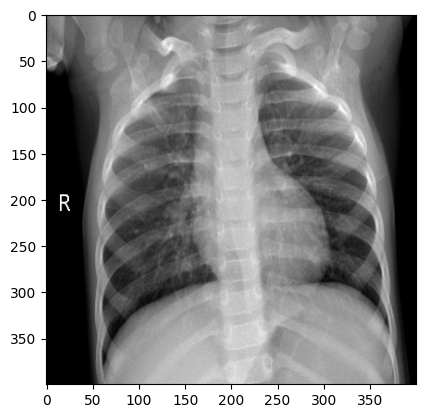

In [24]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices

imggg = cv2.imread('/content/drive/MyDrive/sem6/ai/ai_package/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

Phase 4 : performance evaluation

1/1 [==============================] - 1s 613ms/step


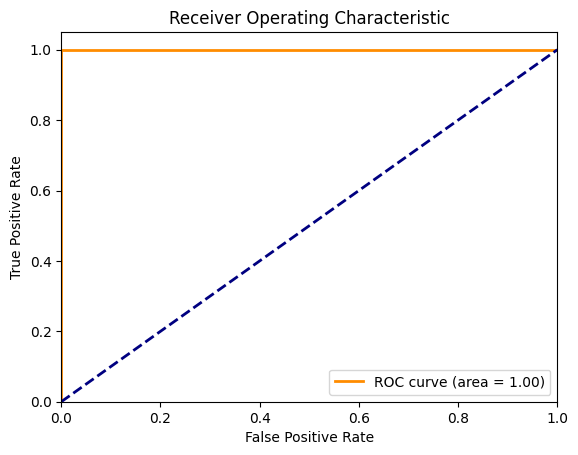

AUC: 1.0


In [26]:
from sklearn.metrics import roc_curve, auc


y_pred_prob = best_model.predict(X_test)


fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")
